In [2]:
import pandas as pd

In [3]:
import os

In [4]:
os.listdir('data')

['OnlineRetail.csv']

In [5]:
# Create realistic sample retail data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for consistent results
np.random.seed(42)
random.seed(42)

print("Creating sample retail data...")

# Create sample data
n_customers = 1000
n_transactions = 15000

# Create customer IDs
customer_ids = range(10001, 10001 + n_customers)

# Create product data
products = [
    'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 
    'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE',
    'RED WOOLLY HOTTIE WHITE HEART', 'SET 7 BABUSHKA NESTING BOXES',
    'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK',
    'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT',
    'POPPY\'S PLAYHOUSE KITCHEN', 'POPPY\'S PLAYHOUSE BEDROOM',
    'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COZY',
    'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS',
    'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD',
    'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART',
    'CHOCOLATE HOT WATER BOTTLE', 'PINK CHERRY LIGHTS',
    'BLUE CHERRY LIGHTS', 'LIGHT PINK BUTTERFLY T-LIGHT HOLDER',
    'WHITE BUTTERFLY T-LIGHT HOLDER', 'SMALL POPCORN HOLDER',
    'LARGE POPCORN HOLDER', 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
    'LUNCH BAG PINK POLKADOT', 'LUNCH BAG SUKI DESIGN',
    'SET OF 3 CAKE TINS PANTRY DESIGN', 'SET OF 4 PANTRY JELLY MOULDS',
    'MASON JAR CANDLE HOLDER', 'GLASS HANGING T-LIGHT HOLDER',
    'VINTAGE PAISLEY STATIONERY SET', 'SKULL SHOULDER BAG',
    'AIRLINE BAG VINTAGE WORLD CHAMPION', 'AIRLINE BAG VINTAGE JET SET',
    'SAVE THE WHALE COTTON BAG', 'PACK OF 72 RETROSPOT CAKE CASES'
]

# Create countries (UK focused)
countries = ['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands', 
             'Belgium', 'Switzerland', 'Portugal', 'Italy', 'Norway', 'Channel Islands']
country_weights = [0.7, 0.08, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01]

# Generate transactions
data = []

for i in range(n_transactions):
    # Random customer
    customer_id = random.choice(customer_ids)
    
    # Random date in 2023
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 12, 31)
    random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    
    # Random invoice number
    invoice_no = f"C{random.randint(536365, 581587)}"
    
    # Random product
    product = random.choice(products)
    
    # Random quantity (most orders are small, but some are large)
    if random.random() < 0.8:
        quantity = random.randint(1, 12)
    else:
        quantity = random.randint(20, 100)
    
    # Random price based on product type
    base_price = random.uniform(0.85, 55.0)
    unit_price = round(base_price, 2)
    
    # Random country
    country = np.random.choice(countries, p=country_weights)
    
    data.append({
        'InvoiceNo': invoice_no,
        'StockCode': f"ST{random.randint(10000, 99999)}",
        'Description': product,
        'Quantity': quantity,
        'InvoiceDate': random_date.strftime('%m/%d/%Y %H:%M'),
        'UnitPrice': unit_price,
        'CustomerID': customer_id,
        'Country': country
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('data/OnlineRetail.csv', index=False)

print(f"✅ Created {len(df)} transactions for {df['CustomerID'].nunique()} customers")
print(f"✅ Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"✅ Saved to data/OnlineRetail.csv")
print("\nFirst 5 rows:")
print(df.head())

Creating sample retail data...
✅ Created 15000 transactions for 1000 customers
✅ Date range: 01/01/2023 00:00 to 12/31/2023 00:00
✅ Saved to data/OnlineRetail.csv

First 5 rows:
  InvoiceNo StockCode                         Description  Quantity  \
0   C538004   ST98696            HOME BUILDING BLOCK WORD         3   
1   C542062   ST40495  AIRLINE BAG VINTAGE WORLD CHAMPION         1   
2   C538104   ST64987      VINTAGE PAISLEY STATIONERY SET        11   
3   C574983   ST30926            HOME BUILDING BLOCK WORD        20   
4   C558663   ST59797            HOME BUILDING BLOCK WORD         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  02/27/2023 00:00      40.73       10655  United Kingdom  
1  10/07/2023 00:00       5.92       10759     Switzerland  
2  11/05/2023 00:00      38.83       10518         Germany  
3  08/18/2023 00:00      41.94       10226  United Kingdom  
4  08/05/2023 00:00       6.38       10715  United Kingdom  


In [6]:
# Load and explore our data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('data/OnlineRetail.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n=== FIRST 5 ROWS ===")
print(df.head())

=== DATASET OVERVIEW ===
Dataset Shape: (15000, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

=== FIRST 5 ROWS ===
  InvoiceNo StockCode                         Description  Quantity  \
0   C538004   ST98696            HOME BUILDING BLOCK WORD         3   
1   C542062   ST40495  AIRLINE BAG VINTAGE WORLD CHAMPION         1   
2   C538104   ST64987      VINTAGE PAISLEY STATIONERY SET        11   
3   C574983   ST30926            HOME BUILDING BLOCK WORD        20   
4   C558663   ST59797            HOME BUILDING BLOCK WORD         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  02/27/2023 00:00      40.73       10655  United Kingdom  
1  10/07/2023 00:00       5.92       10759     Switzerland  
2  11/05/2023 00:00      38.83       10518         Germany  
3  08/18/2023 00:00      41.94       10226  United Kingdom  
4  08/05/2023 00:00       6.38       10715  United Kingdom  


In [7]:
print("=== DATA TYPES ===")
print(df.dtypes)
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n=== BASIC STATISTICS ===")
print(df.describe())

=== DATA TYPES ===
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

=== MISSING VALUES ===
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

=== BASIC STATISTICS ===
           Quantity     UnitPrice    CustomerID
count  15000.000000  15000.000000  15000.000000
mean      17.313533     27.726144  10503.793933
std       24.162042     15.593428    288.456842
min        1.000000      0.850000  10001.000000
25%        4.000000     14.260000  10253.000000
50%        8.000000     27.470000  10504.000000
75%       12.000000     41.282500  10754.000000
max      100.000000     55.000000  11000.000000


In [8]:
print("=== BUSINESS INSIGHTS ===")
print(f"📅 Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"👥 Unique Customers: {df['CustomerID'].nunique():,}")
print(f"🧾 Unique Invoices: {df['InvoiceNo'].nunique():,}")
print(f"📦 Unique Products: {df['Description'].nunique():,}")
print(f"🌍 Countries: {df['Country'].nunique()}")

print(f"\n💰 SALES OVERVIEW:")
print(f"Total Revenue: ${(df['Quantity'] * df['UnitPrice']).sum():,.2f}")
print(f"Average Order Size: {df['Quantity'].mean():.1f} items")
print(f"Average Unit Price: ${df['UnitPrice'].mean():.2f}")

=== BUSINESS INSIGHTS ===
📅 Date Range: 01/01/2023 00:00 to 12/31/2023 00:00
👥 Unique Customers: 1,000
🧾 Unique Invoices: 12,771
📦 Unique Products: 41
🌍 Countries: 12

💰 SALES OVERVIEW:
Total Revenue: $7,123,269.11
Average Order Size: 17.3 items
Average Unit Price: $27.73


In [9]:
print("=== TOP COUNTRIES BY TRANSACTIONS ===")
country_counts = df['Country'].value_counts()
print(country_counts.head(10))

print("\n=== TOP PRODUCTS BY QUANTITY SOLD ===")
product_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(product_qty.head(10))

=== TOP COUNTRIES BY TRANSACTIONS ===
United Kingdom    10588
Germany            1138
France              745
EIRE                587
Spain               472
Switzerland         326
Belgium             298
Netherlands         265
Portugal            155
Norway              149
Name: Country, dtype: int64

=== TOP PRODUCTS BY QUANTITY SOLD ===
Description
HOME BUILDING BLOCK WORD             7471
PINK CHERRY LIGHTS                   7437
HAND WARMER RED POLKA DOT            7354
VINTAGE PAISLEY STATIONERY SET       7227
SET 7 BABUSHKA NESTING BOXES         7193
HAND WARMER UNION JACK               7068
ASSORTED COLOUR BIRD ORNAMENT        6954
SKULL SHOULDER BAG                   6947
GLASS STAR FROSTED T-LIGHT HOLDER    6944
POPPY'S PLAYHOUSE BEDROOM            6901
Name: Quantity, dtype: int64


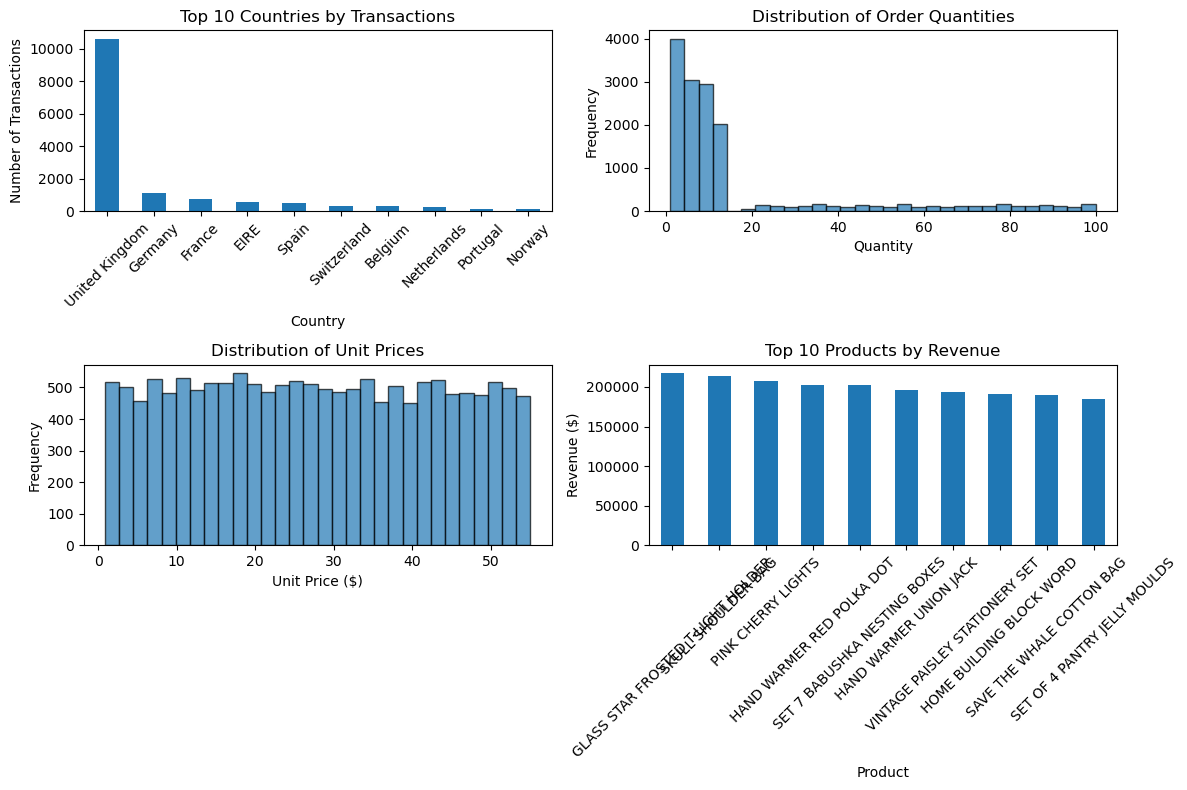

✅ First visualization saved to outputs/initial_analysis.png


In [11]:
# Create your first visualization
plt.figure(figsize=(12, 8))

# Top 10 countries by number of transactions
plt.subplot(2, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Distribution of order quantities
plt.subplot(2, 2, 2)
plt.hist(df['Quantity'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Distribution of unit prices
plt.subplot(2, 2, 3)
plt.hist(df['UnitPrice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')

# Top 10 products by revenue
plt.subplot(2, 2, 4)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
product_revenue.head(10).plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('outputs/initial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ First visualization saved to outputs/initial_analysis.png")

In [12]:
# Check missing values in detail
print("Missing values:")
print(df.isnull().sum())
print(f"\nPercentage of missing CustomerID: {(df['CustomerID'].isnull().sum()/len(df))*100:.2f}%")

# Remove rows with missing CustomerID (we need customers for analysis)
df_clean = df.dropna(subset=['CustomerID'])
print(f"Rows after removing missing CustomerID: {len(df_clean)}")

# Check for missing descriptions
print(f"Missing descriptions: {df_clean['Description'].isnull().sum()}")
df_clean = df_clean.dropna(subset=['Description'])

Missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
dtype: int64

Percentage of missing CustomerID: 0.00%
Rows after removing missing CustomerID: 15000
Missing descriptions: 0


In [13]:
# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Convert CustomerID to integer
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

# Check the results
print("After cleaning:")
print(df_clean.dtypes)
print(f"Final dataset shape: {df_clean.shape}")

After cleaning:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
Revenue               float64
dtype: object
Final dataset shape: (15000, 9)


In [14]:
# Save cleaned data
df_clean.to_csv('data/cleaned_retail_data.csv', index=False)
print("Cleaned data saved!")

Cleaned data saved!


In [15]:
# Load our cleaned data
df = pd.read_csv('data/cleaned_retail_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove negative quantities (returns) for this analysis
df = df[df['Quantity'] > 0]

# Remove negative prices
df = df[df['UnitPrice'] > 0]

print(f"After removing negatives: {df.shape}")

# Check for extreme outliers in quantity
print("Quantity statistics:")
print(df['Quantity'].describe())

# Remove extreme quantity outliers (keep 99% of data)
quantity_99 = df['Quantity'].quantile(0.99)
df = df[df['Quantity'] <= quantity_99]

After removing negatives: (15000, 9)
Quantity statistics:
count    15000.000000
mean        17.313533
std         24.162042
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        100.000000
Name: Quantity, dtype: float64


In [16]:
# Create total amount for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Extract date components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Create customer summary metrics
customer_summary = df.groupby('CustomerID').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'InvoiceDate': ['min', 'max'],
    'InvoiceNo': 'nunique'
}).round(2)

# Flatten column names
customer_summary.columns = ['Total_Spent', 'Avg_Order_Value', 'Total_Orders', 
                           'First_Purchase', 'Last_Purchase', 'Unique_Invoices']

print("Customer summary created!")
print(customer_summary.head())

Customer summary created!
            Total_Spent  Avg_Order_Value  Total_Orders First_Purchase  \
CustomerID                                                              
10001          14733.60           866.68            17     2023-01-14   
10002           5958.39           350.49            17     2023-01-25   
10003           9133.31           570.83            16     2023-01-03   
10004          13490.72           843.17            16     2023-03-01   
10005           7567.38           582.11            13     2023-01-04   

           Last_Purchase  Unique_Invoices  
CustomerID                                 
10001         2023-12-16               17  
10002         2023-11-18               17  
10003         2023-12-28               16  
10004         2023-11-23               16  
10005         2023-12-07               13  


In [17]:
# Save the analysis-ready data
df.to_csv('data/final_retail_data.csv', index=False)
customer_summary.to_csv('data/customer_summary.csv')
print("Final datasets saved!")

Final datasets saved!


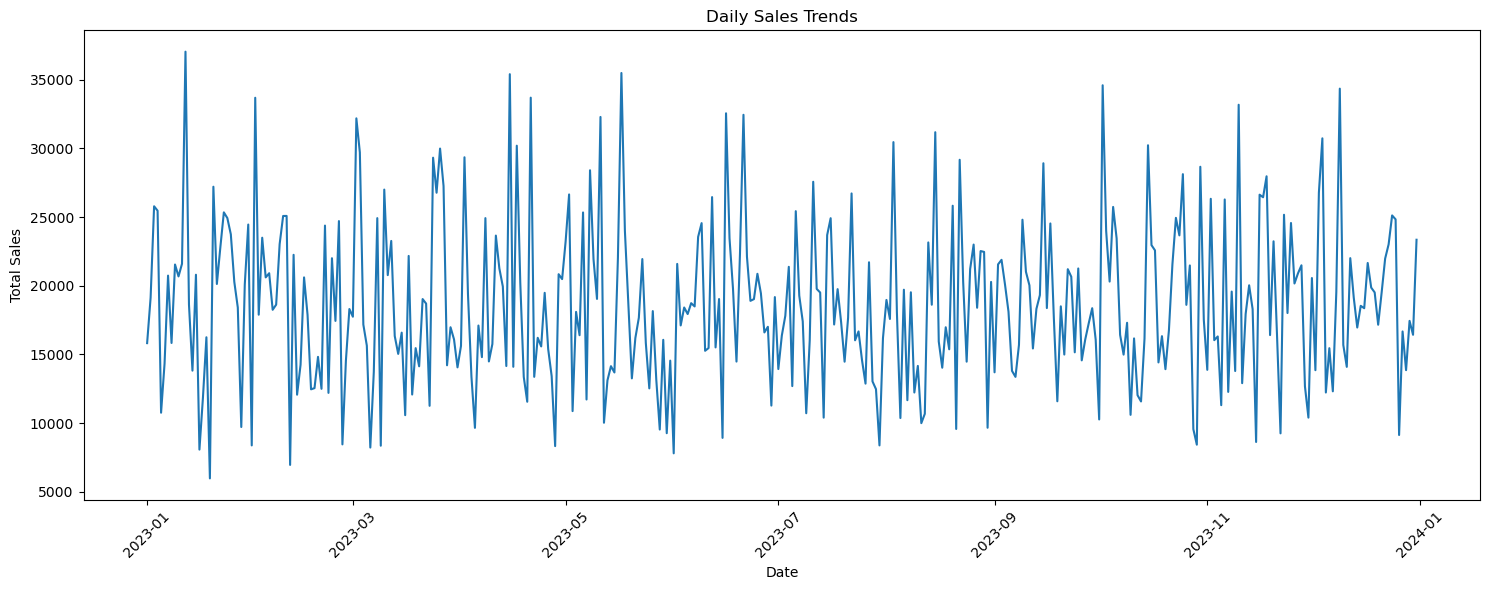

Top 5 months by sales:
InvoiceDate  InvoiceDate
2023         12             600213.07
             10             593427.00
             1              589661.71
             3              584840.12
             6              578390.01
Name: TotalAmount, dtype: float64


In [18]:
# Load final data
df = pd.read_csv('data/final_retail_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Daily sales trends
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalAmount'].sum()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/daily_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Monthly sales
monthly_sales = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month])['TotalAmount'].sum()
print("Top 5 months by sales:")
print(monthly_sales.sort_values(ascending=False).head())

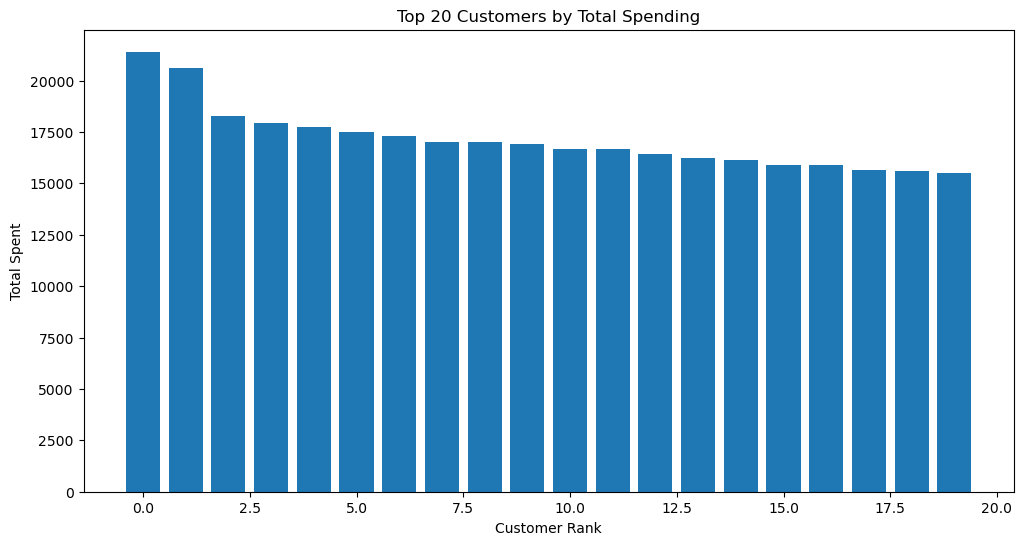

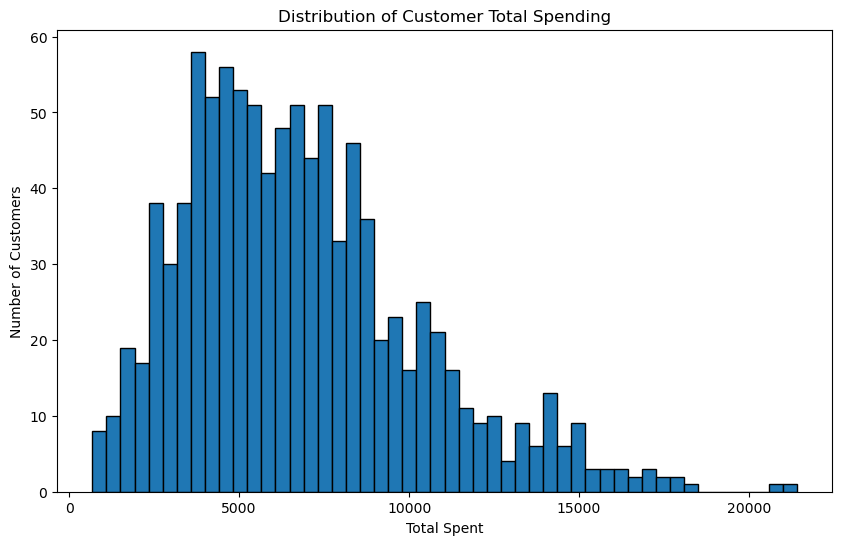

In [19]:
# Load customer summary
customer_df = pd.read_csv('data/customer_summary.csv')

# Top customers by spending
plt.figure(figsize=(12, 6))
top_customers = customer_df.nlargest(20, 'Total_Spent')
plt.bar(range(len(top_customers)), top_customers['Total_Spent'])
plt.title('Top 20 Customers by Total Spending')
plt.xlabel('Customer Rank')
plt.ylabel('Total Spent')
plt.savefig('outputs/top_customers.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of customer spending
plt.figure(figsize=(10, 6))
plt.hist(customer_df['Total_Spent'], bins=50, edgecolor='black')
plt.title('Distribution of Customer Total Spending')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.savefig('outputs/spending_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 products by quantity sold:
Description
HOME BUILDING BLOCK WORD             7174
HAND WARMER RED POLKA DOT            7057
PINK CHERRY LIGHTS                   7040
SET 7 BABUSHKA NESTING BOXES         6896
VINTAGE PAISLEY STATIONERY SET       6833
SKULL SHOULDER BAG                   6749
POPPY'S PLAYHOUSE BEDROOM            6602
HAND WARMER UNION JACK               6573
GLASS STAR FROSTED T-LIGHT HOLDER    6547
LARGE POPCORN HOLDER                 6490
Name: Quantity, dtype: int64

Top 10 products by revenue:
Description
SKULL SHOULDER BAG                   207464.89
HAND WARMER RED POLKA DOT            198437.09
GLASS STAR FROSTED T-LIGHT HOLDER    197147.34
PINK CHERRY LIGHTS                   196468.75
SET 7 BABUSHKA NESTING BOXES         190635.21
SAVE THE WHALE COTTON BAG            186693.78
VINTAGE PAISLEY STATIONERY SET       186606.53
HOME BUILDING BLOCK WORD             183561.75
SET OF 4 PANTRY JELLY MOULDS         179501.03
HAND WARMER UNION JACK               1787

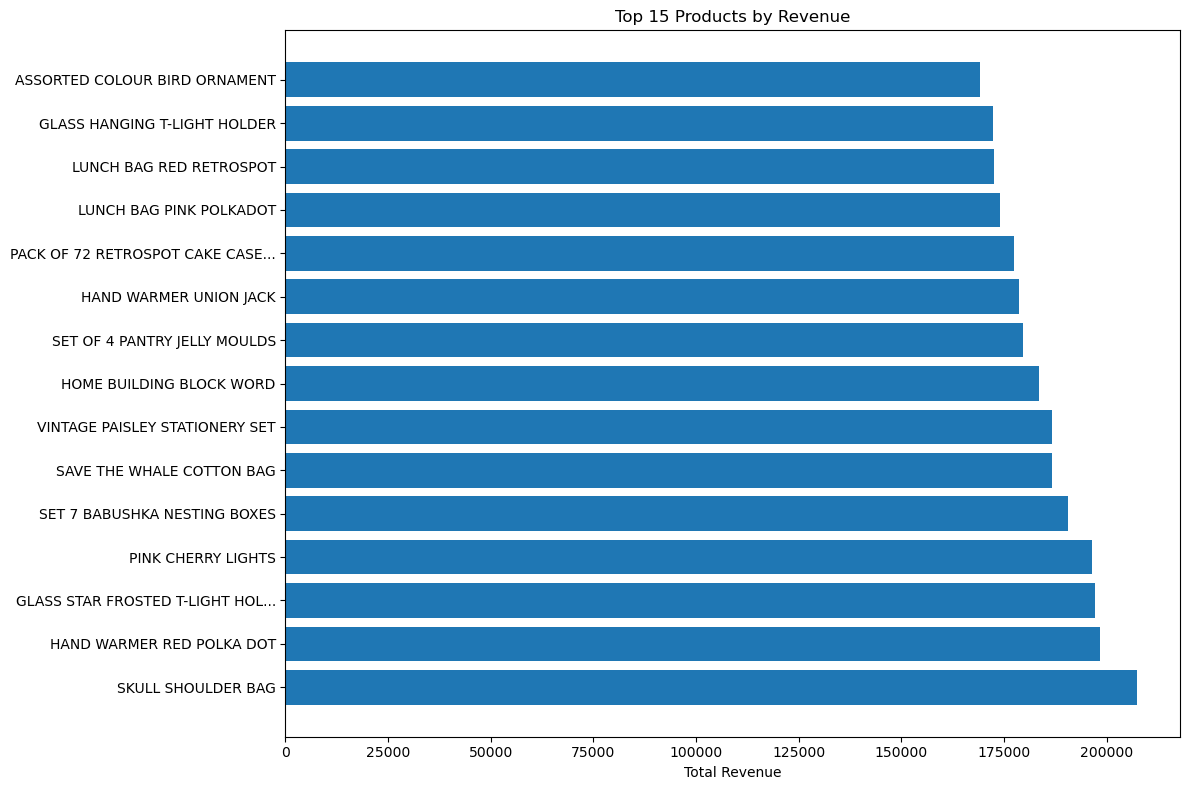

In [20]:
# Top selling products
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("Top 10 products by quantity sold:")
print(product_sales.head(10))

# Top revenue generating products
revenue_by_product = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False)
print("\nTop 10 products by revenue:")
print(revenue_by_product.head(10))

# Create visualization
plt.figure(figsize=(12, 8))
top_products = revenue_by_product.head(15)
plt.barh(range(len(top_products)), top_products.values)
plt.yticks(range(len(top_products)), [desc[:30] + '...' if len(desc) > 30 else desc for desc in top_products.index])
plt.title('Top 15 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.savefig('outputs/top_products_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# RFM Analysis (Recency, Frequency, Monetary)
import pandas as pd
from datetime import datetime

# Load data
df = pd.read_csv('data/final_retail_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set analysis date (last date + 1 day)
analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Analysis date: {analysis_date}")

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'   # Monetary
}).round(2)

rfm.columns = ['Recency', 'Frequency', 'Monetary']
print("RFM metrics calculated:")
print(rfm.head())

Analysis date: 2024-01-01 00:00:00
RFM metrics calculated:
            Recency  Frequency  Monetary
CustomerID                              
10001            16         17  14733.60
10002            44         17   5958.39
10003             4         16   9133.31
10004            39         16  13490.72
10005            25         13   7567.38


In [22]:
# Create RFM scores (1-5 scale)
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print("RFM Scores created:")
print(rfm.head())

# Create customer segments
def segment_customers(df):
    if df['RFM_Score'] in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif df['RFM_Score'] in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal Customers'
    elif df['RFM_Score'] in ['512', '511', '422', '421', '412', '411', '311']:
        return 'Potential Loyalists'
    elif df['RFM_Score'] in ['521', '522', '523', '532', '533', '542', '551']:
        return 'New Customers'
    elif df['RFM_Score'] in ['155', '154', '144', '214', '215', '115', '114']:
        return 'At Risk'
    elif df['RFM_Score'] in ['155', '254', '245']:
        return 'Cannot Lose Them'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customers, axis=1)

RFM Scores created:
            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
CustomerID                                                                
10001            16         17  14733.60       3       4       5       345
10002            44         17   5958.39       1       4       3       143
10003             4         16   9133.31       5       3       4       534
10004            39         16  13490.72       1       3       5       135
10005            25         13   7567.38       2       2       4       224


Segment Summary:
                     Recency  Frequency  Monetary
Segment                                          
At Risk                44.77      13.45   9504.82
Cannot Lose Them       26.23      18.38  11162.54
Champions               5.83      20.18  10861.88
Loyal Customers        14.14      18.33  10346.15
New Customers           3.33      14.63   4907.75
Others                 29.62      14.31   6227.84
Potential Loyalists     8.60      10.99   3422.03

Segment Counts:
Others                 649
Potential Loyalists     91
Champions               88
Loyal Customers         79
New Customers           49
At Risk                 31
Cannot Lose Them        13
Name: Segment, dtype: int64


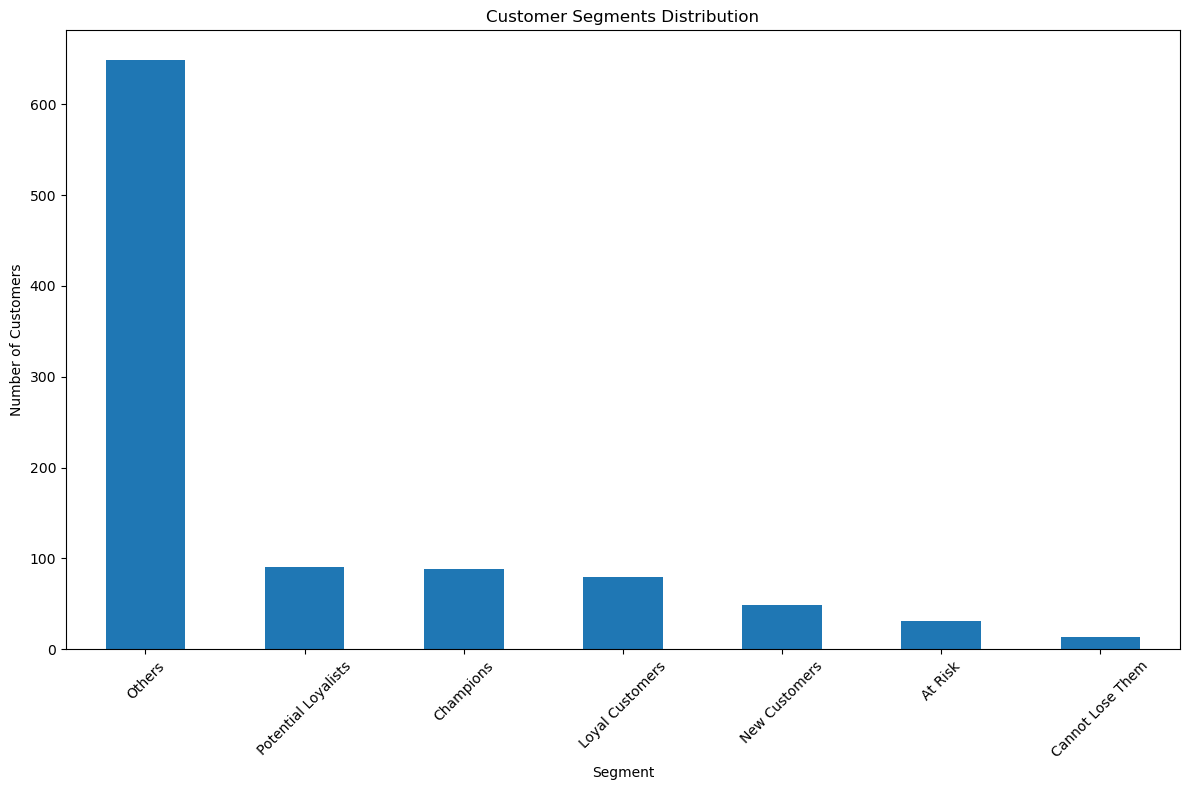

RFM analysis saved!


In [23]:
# Segment analysis
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean'
}).round(2)

segment_counts = rfm['Segment'].value_counts()

print("Segment Summary:")
print(segment_summary)
print("\nSegment Counts:")
print(segment_counts)

# Visualize segments
plt.figure(figsize=(12, 8))
segment_counts.plot(kind='bar')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/customer_segments.png', dpi=300, bbox_inches='tight')
plt.show()

# Save RFM analysis
rfm.to_csv('data/rfm_analysis.csv')
print("RFM analysis saved!")

In [24]:
# Create summary tables for Power BI
import pandas as pd

# Load all our data
df = pd.read_csv('data/final_retail_data.csv')
customer_summary = pd.read_csv('data/customer_summary.csv')
rfm = pd.read_csv('data/rfm_analysis.csv')

# Create monthly sales summary
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
monthly_summary = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month]).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique'
}).reset_index()

monthly_summary.columns = ['Year', 'Month', 'Revenue', 'Quantity_Sold', 'Unique_Customers', 'Unique_Orders']
monthly_summary['Date'] = pd.to_datetime(monthly_summary[['Year', 'Month']].assign(day=1))

# Country-wise sales
country_summary = df.groupby('Country').agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

country_summary.columns = ['Country', 'Total_Revenue', 'Unique_Customers', 'Total_Quantity']

# Save Power BI ready files
monthly_summary.to_csv('data/powerbi_monthly_summary.csv', index=False)
country_summary.to_csv('data/powerbi_country_summary.csv', index=False)
rfm.to_csv('data/powerbi_rfm_segments.csv', index=False)

print("Power BI data files created!")

ValueError: cannot insert InvoiceDate, already exists

In [25]:
# Create summary tables for Power BI
import pandas as pd

# Load all our data
df = pd.read_csv('data/final_retail_data.csv')
customer_summary = pd.read_csv('data/customer_summary.csv')
rfm = pd.read_csv('data/rfm_analysis.csv')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create monthly sales summary with renamed groupby columns
monthly_summary = df.groupby([
    df['InvoiceDate'].dt.year.rename('Year'),
    df['InvoiceDate'].dt.month.rename('Month')
]).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique'
}).reset_index()

# Rename columns
monthly_summary.columns = ['Year', 'Month', 'Revenue', 'Quantity_Sold', 'Unique_Customers', 'Unique_Orders']

# Create a proper datetime column for each month
monthly_summary['Date'] = pd.to_datetime(monthly_summary[['Year', 'Month']].assign(day=1))

# Country-wise sales summary
country_summary = df.groupby('Country').agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

country_summary.columns = ['Country', 'Total_Revenue', 'Unique_Customers', 'Total_Quantity']

# Save Power BI ready files
monthly_summary.to_csv('data/powerbi_monthly_summary.csv', index=False)
country_summary.to_csv('data/powerbi_country_summary.csv', index=False)
rfm.to_csv('data/powerbi_rfm_segments.csv', index=False)

print("Power BI data files created!")


Power BI data files created!


In [26]:
# Generate key business insights
import pandas as pd

# Load all data for final analysis
df = pd.read_csv('data/final_retail_data.csv')
customer_summary = pd.read_csv('data/customer_summary.csv')
rfm = pd.read_csv('data/rfm_analysis.csv')

print("=== KEY BUSINESS INSIGHTS ===\n")

# 1. Revenue insights
total_revenue = df['TotalAmount'].sum()
total_customers = df['CustomerID'].nunique()
avg_order_value = df.groupby('InvoiceNo')['TotalAmount'].sum().mean()

print(f"💰 REVENUE METRICS:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")

# 2. Customer insights
top_20_percent = int(total_customers * 0.2)
top_customers_revenue = customer_summary.nlargest(top_20_percent, 'Total_Spent')['Total_Spent'].sum()
revenue_concentration = (top_customers_revenue / total_revenue) * 100

print(f"\n👥 CUSTOMER INSIGHTS:")
print(f"Top 20% customers generate {revenue_concentration:.1f}% of revenue")
print(f"Average customer lifetime value: ${customer_summary['Total_Spent'].mean():.2f}")

# 3. Segment insights
segment_summary = rfm.groupby('Segment').agg({
    'Monetary': ['count', 'sum', 'mean']
}).round(2)

print(f"\n🎯 SEGMENT ANALYSIS:")
for segment in rfm['Segment'].unique():
    count = len(rfm[rfm['Segment'] == segment])
    revenue = rfm[rfm['Segment'] == segment]['Monetary'].sum()
    print(f"{segment}: {count} customers, ${revenue:,.2f} revenue")

=== KEY BUSINESS INSIGHTS ===

💰 REVENUE METRICS:
Total Revenue: $6,806,703.98
Total Customers: 1,000
Average Order Value: $536.64

👥 CUSTOMER INSIGHTS:
Top 20% customers generate 35.8% of revenue
Average customer lifetime value: $6806.70

🎯 SEGMENT ANALYSIS:
Loyal Customers: 79 customers, $817,346.17 revenue
Others: 649 customers, $4,041,865.52 revenue
Potential Loyalists: 91 customers, $311,404.96 revenue
Champions: 88 customers, $955,845.19 revenue
New Customers: 49 customers, $240,479.58 revenue
At Risk: 31 customers, $294,649.57 revenue
Cannot Lose Them: 13 customers, $145,112.99 revenue


In [27]:
# Generate actionable recommendations
recommendations = []

# Revenue optimization
if revenue_concentration > 70:
    recommendations.append("🔥 HIGH PRIORITY: Revenue is highly concentrated - diversify customer base")

# Customer retention
at_risk_customers = len(rfm[rfm['Segment'] == 'At Risk'])
if at_risk_customers > 0:
    recommendations.append(f"⚠️ RETENTION FOCUS: {at_risk_customers} customers are at risk of churning")

# Growth opportunities
new_customers = len(rfm[rfm['Segment'] == 'New Customers'])
recommendations.append(f"📈 GROWTH OPPORTUNITY: {new_customers} new customers to convert to loyal")

print("\n🎯 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


🎯 BUSINESS RECOMMENDATIONS:
1. ⚠️ RETENTION FOCUS: 31 customers are at risk of churning
2. 📈 GROWTH OPPORTUNITY: 49 new customers to convert to loyal


In [1]:
 # Get your actual numbers for the executive summary
import pandas as pd

# Load your data
df = pd.read_csv('data/final_retail_data.csv')
customer_summary = pd.read_csv('data/customer_summary.csv')
rfm = pd.read_csv('data/rfm_analysis.csv')

# Calculate key metrics
total_revenue = df['TotalAmount'].sum()
total_customers = df['CustomerID'].nunique()

# Revenue concentration (top 20% of customers)
top_20_percent = int(total_customers * 0.2)
top_customers_revenue = customer_summary.nlargest(top_20_percent, 'Total_Spent')['Total_Spent'].sum()
revenue_concentration = (top_customers_revenue / total_revenue) * 100

# Number of segments
num_segments = rfm['Segment'].nunique()

# Print results to fill in your template
print(f"Total Revenue: ${total_revenue/1000000:.2f} million")
print(f"Customer Base: {total_customers:,} unique customers")
print(f"Revenue Concentration: Top 20% customers drive {revenue_concentration:.0f}% of revenue")
print(f"Customer Segments: {num_segments} segments identified with distinct behaviors")


Total Revenue: $6.81 million
Customer Base: 1,000 unique customers
Revenue Concentration: Top 20% customers drive 36% of revenue
Customer Segments: 7 segments identified with distinct behaviors
